In [2]:
import numpy as nm # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("WineQT.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
df = pd.read_csv("WineQT.csv", usecols = [0,1,11])

In [6]:
df

,fixed acidity,volatile acidity,quality
0,7.4,0.700,5
1,7.8,0.880,5
2,7.8,0.760,5
3,11.2,0.280,6
4,7.4,0.700,5
...,...,...,...
1138,6.3,0.510,6
1139,6.8,0.620,6
1140,6.2,0.600,5
1141,5.9,0.550,6


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fixed acidity', ylabel='Density'>

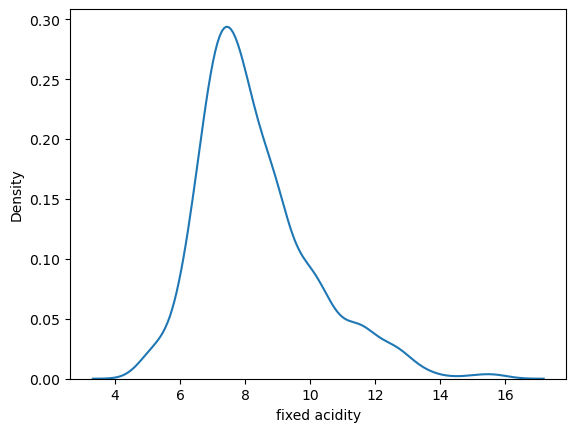

In [7]:
sns.kdeplot(df['fixed acidity'])

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='volatile acidity', ylabel='Density'>

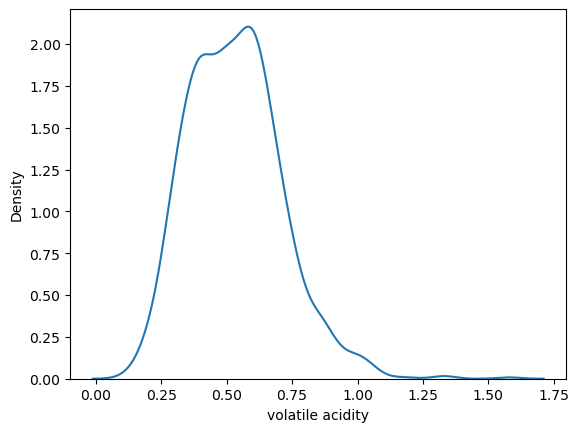

In [8]:
sns.kdeplot(df['volatile acidity'])

In [9]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

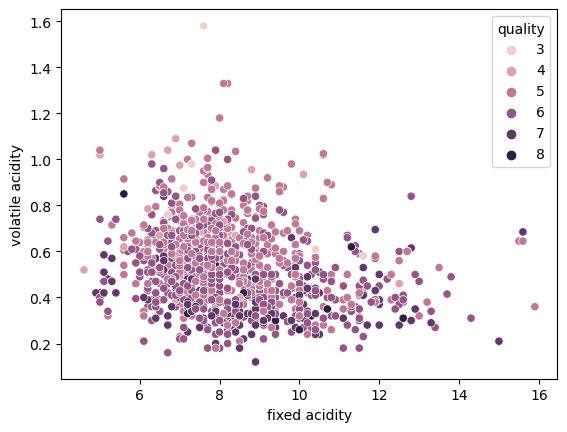

In [10]:
# color_dict = {1 : 'red', 2: 'blue', 3 : 'green'}
# sns.scatterplot(df['fixed acidity'], df['volatile acidity'], hue = df['quality'], palette = color_dict)
sns.scatterplot(data = df,  x = 'fixed acidity', y = 'volatile acidity', hue = 'quality')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis = 1), 
                                                    df['quality'], 
                                                    test_size = 0.3, 
                                                    random_state = 0)
X_train.shape, X_test.shape

((800, 2), (343, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parametersabs
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [15]:
nm.round(X_train.describe(), 1)

,fixed acidity,volatile acidity
count,800.0,800.0
mean,8.3,0.5
std,1.8,0.2
min,4.6,0.1
25%,7.1,0.4
50%,7.9,0.5
75%,9.1,0.6
max,15.9,1.3


In [16]:
nm.round(X_train_scaled.describe(), 1)

,fixed acidity,volatile acidity
count,800.0,800.0
mean,0.3,0.3
std,0.2,0.1
min,0.0,0.0
25%,0.2,0.2
50%,0.3,0.3
75%,0.4,0.4
max,1.0,1.0


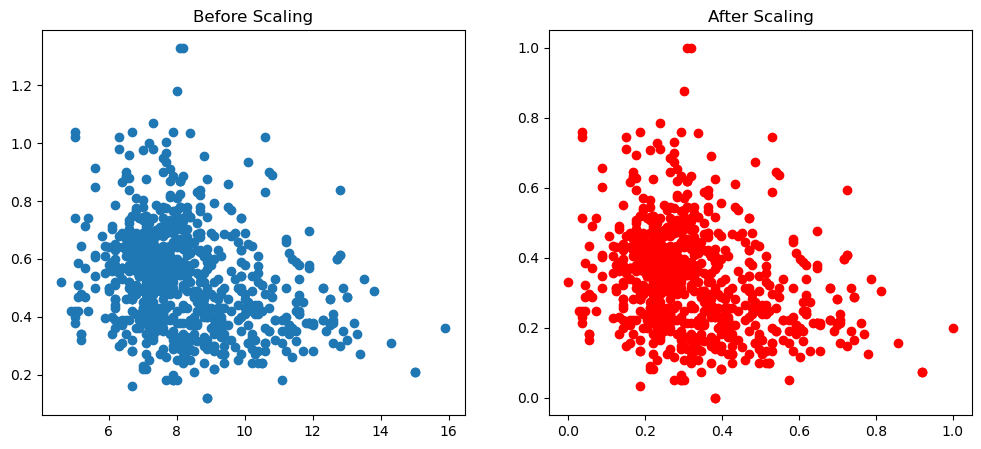

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['fixed acidity'], X_train['volatile acidity'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['fixed acidity'], X_train_scaled['volatile acidity'], color = 'red')
ax2.set_title("After Scaling")
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

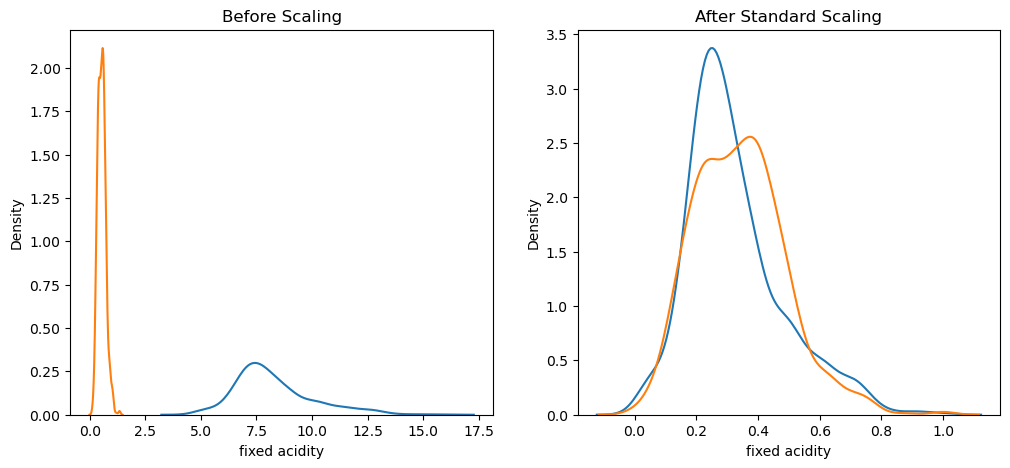

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['fixed acidity'], ax = ax1)
sns.kdeplot(X_train['volatile acidity'], ax = ax1)

# after scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['fixed acidity'], ax = ax2)
sns.kdeplot(X_train_scaled['volatile acidity'], ax = ax2)
plt.show()